In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

import hvplot
import hvplot.pandas  # noqa


In [2]:
pd.set_option("display.width", 700)
pd.set_option('display.max_rows',100)
pd.set_option("display.max_columns", None)

### Dataset upload, info

In [32]:
df_orig = pd.read_csv('C:/Users/Сергей/Desktop/Projects/Python/Consumers habit HVplt/Sales/SalesForCourse_quizz_table.csv') # index_col=0
df = df_orig.copy()
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [7]:
def data_info(df):
    print(' SHAPE '.center(60, '-'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(' COLUMNS '.center(60, '-'))
    print('Column names: {}'.format([i for i in df.columns]))
    print(' TYPES '.center(60, '-'))
    print(df.dtypes)
    print(' DUPLICATES '.center(60, '-'))
    print('Total duplicates: {}'.format(df.duplicated().sum()))
    print(' NULL VALUES '.center(60, '-'))
    print(df.isnull().sum())
    
data_info(df)


-------------------------- SHAPE ---------------------------
Rows: 34867
Columns: 16
------------------------- COLUMNS --------------------------
Column names: ['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1']
-------------------------- TYPES ---------------------------
index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object
------------------------ DUPLICATES ------------------------
Total duplicates: 0
----------------------- NULL VALUES -----

### Cleaning

#### Indexing

Make an existing index column as the dataset index.

In [33]:
df.set_index('index', inplace=True)

#### Renaming

All column names start with capital letters, also spaces are used between words. Make all names lower-case, replace spaces with `**under-stroke**`

In [34]:
col_names = {}
for i in df.columns:
    col_names[i] = i.lower().replace(' ', '_')
df = df.rename(columns=col_names)
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
index,,,,,,,,,,,,,,,
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


#### Null values

There is one NA value in every column; additionally, there are many NAs in Column1.

In [14]:
df[df['date'].isnull()]

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
index,,,,,,,,,,,,,,,
34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


It appears that all null values are concentrated in one row. Apart from the revenue value, it does not contain any information. Therefore, this row can be discarded.

In [35]:
df.drop([34866], inplace=True)

In [7]:
df.isnull().sum()

date                    0
year                    0
month                   0
customer_age            0
customer_gender         0
country                 0
state                   0
product_category        0
sub_category            0
quantity                0
unit_cost               0
unit_price              0
cost                    0
revenue                 0
column1             32292
dtype: int64

There are no more null values in major columns (except for column1 that will be dealt with later)

#### Date

The dates are given as strings, format is 'dd/mm/yy'. Firstly, convert the date column to a proper format.

In [36]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
index,,,,,,,,,,,,,,,
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


There are also additional columns containing the year and the month; however, years are recorded as floating numbers and months' names are given. To make further analysis easier, firstly, the year should be converted to integer, secondly, months' names should be replaced with a corresponding digit. 

In [37]:
#Conveting year to integer
df['year'] = pd.to_numeric(df['year'], downcast='integer')
print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='year']])

#Replacing month names with digits
df = df.drop('month', axis=1)
df['month'] = df['date'].dt.month
df.insert(2, 'month', df.pop('month'))

df.head()

year    int16
dtype: object


C:\Users\Сергей\AppData\Local\Temp\ipykernel_9068\3872269512.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='year']])


,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
index,,,,,,,,,,,,,,,
0,2016-02-19,2016,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016,2,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016,3,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


#### Customer age

From float to integer

In [38]:
df['customer_age'] = pd.to_numeric(df['customer_age'], downcast='integer')
print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='customer_age']])
# for i in range(len(df.columns)):
#     print(df.columns[i])

customer_age    int8
dtype: object


C:\Users\Сергей\AppData\Local\Temp\ipykernel_9068\858647335.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='customer_age']])


#### Gender

In [10]:
df['customer_gender'].unique()

array(['F', 'M'], dtype=object)

Gender of customers is recorded as 'F' and 'M'. For clarity, 'F' can be replaced with 'Female', and 'M' with 'Male'. 

In [39]:
def replace_gender(value):
    if value == 'F':
        return value.replace(value, 'Female')
    elif value == 'M':
        return value.replace(value, 'Male')

df['customer_gender'] = df['customer_gender'].apply(lambda x: replace_gender(x))
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
index,,,,,,,,,,,,,,,
0,2016-02-19,2016,2,29,Female,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016,2,29,Female,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016,2,29,Female,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016,3,29,Female,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016,3,29,Female,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [27]:
# Original solution
# df['customer_gender'] = df['customer_gender'].str.replace('F', 'Female')
# df['customer_gender'] = df['customer_gender'].str.replace('M', 'Male')

#### Quantity

From float to integer

In [40]:
df['quantity'] = pd.to_numeric(df['quantity'], downcast='integer')
print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='quantity']])

quantity    int8
dtype: object


C:\Users\Сергей\AppData\Local\Temp\ipykernel_9068\3628713773.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.dtypes[[i for i in range(len(df.columns)) if df.columns[i]=='quantity']])


#### Unit price

The number of digits after a decimal point is not constant. So, round down to 2 digits after decimal point

In [41]:
df['unit_price'] = np.round(df['unit_price'], 2)

#### Column1

In the dataset source, there is no description of what the values in Column1 represent. Thus, it can be discarded from the dataset.

In [42]:
df = df.drop('column1', axis=1)

### Analysis and Visualisation

In [43]:
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue
index,,,,,,,,,,,,,,
0,2016-02-19,2016,2,29,Female,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.00,80.0,109.0
1,2016-02-20,2016,2,29,Female,United States,Washington,Clothing,Gloves,2,24.50,28.50,49.0,57.0
2,2016-02-27,2016,2,29,Female,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.00,11.0,15.0
3,2016-03-12,2016,3,29,Female,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.50,175.0,233.0
4,2016-03-12,2016,3,29,Female,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.67,105.0,125.0


#### Revenue per month

Finding how much revenue was generated per every month of every year.

In [44]:
#Group the date by year and month
res = df[['year', 'month', 'revenue']].groupby(by=['year', 'month']).sum().sort_values(['year', 'month'])

#reset index
res.reset_index(inplace=True)
res

,year,month,revenue
0,2015,1,230549.0
1,2015,2,259857.0
2,2015,3,250358.0
3,2015,4,284143.0
4,2015,5,320629.0
5,2015,6,337756.0
6,2015,7,789054.0
7,2015,8,1248185.0
8,2015,9,1295246.0
9,2015,10,1376969.0


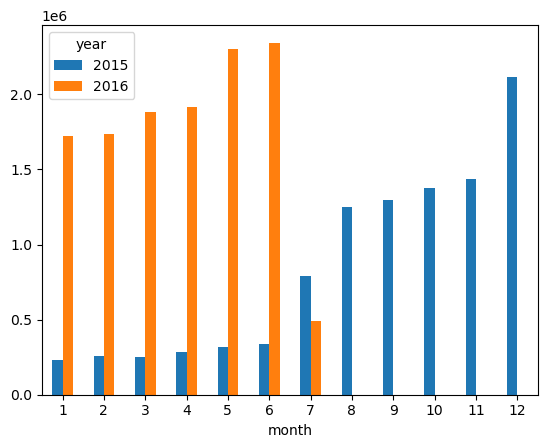

In [53]:
#Pivot table chart (using pd.plot(bar))
pvt = res.pivot(index='month', columns='year', values='revenue')

month = range(1, 20)
# hv.bar()
pvt.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [49]:
res.hvplot.bar(x='month', y='revenue', by='year', rot=90, 
               xlabel='Month, year', ylabel='Total revenue($)')

:Bars   [month,year]   (revenue)

potential questions:
1. Why is revenue in 2015 much lower compared to 2016? Less shoppers? lower average price?
2. The closing date in Aug 2016